# REUTER DATASET

목표: 로이터 뉴스를 46개의 토픽으로 분류한다. 
cf.다중분류 문제의 예. 각 뉴스가 하나의 범주로 분류됨으로 단일 레이블 다중 분류다. 만일 여러개의 범주로 나뉜다면 그것은 다중 레이블 다중 분류 문제일 것이다.

구성: 46개의 토픽으로 구성. 각 토픽은 10개 이상의 샘플로 이루어짐.

In [1]:
from keras.datasets import reuters

(train_data,train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
#IMDB처럼 num_words 매개변수는 데이터에서 가장 자주 등장하는 단어 1만개로 제한
#train 데이터는 IMDB처럼 정수 리스트

In [2]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()] )
decoded_newswire = ' '.join([reverse_word_index.get(i - 3 , '?') for i in train_data[0]]) 
#0,1,2는 패딩, 문서 시작, 사전에 없음을 위한 인덱스이므로 3을 뺀다 cf. IMDB도 동일
train_labels[10] #샘플에 연결된 레이블은 토픽의 인덱스로 0~45 사이의 정수

3

In [3]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000): #one-hot encoding함수 구현
    results = np.zeros((len(sequences),dimension)) #행:sequences, 열:dimension 크기의 원소가 0인 배열 생성
    for i, sequence in enumerate(sequences): #enumerate는 (리스트의 원소 인덱스, 원소)로 반환한다. -> i:인덱스 sequence:원소 
        results[i,sequence] = 1. #results[i]에서 특정 인덱스의 위치를 1로 만든다
    return results

x_train = vectorize_sequences(train_data) #훈련 데이터 백터 변환
x_test = vectorize_sequences(test_data) #테스트 데이터 백터 변환
one_hot_train_labels = vectorize_sequences(train_labels,46) # 레이블은 0~45까지의 인덱스이므로 demention을 46으로 해야함
one_hot_test_labels = vectorize_sequences(test_labels,46)

#cf.MNIST예제처럼 to_categorical 내장함수를 사용해도 됨

In [4]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,))) #Output layer가 46개. 따라서 hidden layer는 이보다 많아야함
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax')) #MNIST와 동일하게 각 입력 샘플마다 46개의 출력 클래스에 대한 확률 분포를 출력
                                                 #46개의 값을 더하면 1이다

In [5]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [6]:
x_val = x_train[:1000] #처음부터 인덱스9999까지
partial_x_train = x_train[1000:] #10000부터 끝까지
y_val = one_hot_train_labels[:1000] #검증할 데이터
partial_y_train = one_hot_train_labels[1000:] #훈련시킬 데이터

In [7]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 1s 31ms/step - loss: 2.5993 - accuracy: 0.5331 - val_loss: 1.7253 - val_accuracy: 0.6310
Epoch 2/20
16/16 [==============================] - 0s 16ms/step - loss: 1.4111 - accuracy: 0.6994 - val_loss: 1.2994 - val_accuracy: 0.7130
Epoch 3/20
16/16 [==============================] - 0s 17ms/step - loss: 1.0459 - accuracy: 0.7711 - val_loss: 1.1145 - val_accuracy: 0.7520
Epoch 4/20
16/16 [==============================] - 0s 17ms/step - loss: 0.8211 - accuracy: 0.8275 - val_loss: 1.0244 - val_accuracy: 0.7730
Epoch 5/20
16/16 [==============================] - 0s 22ms/step - loss: 0.6482 - accuracy: 0.8639 - val_loss: 0.9579 - val_accuracy: 0.7910
Epoch 6/20
16/16 [==============================] - 0s 19ms/step - loss: 0.5151 - accuracy: 0.8918 - val_loss: 0.9773 - val_accuracy: 0.7800
Epoch 7/20
16/16 [==============================] - 0s 18ms/step - loss: 0.4178 - accuracy: 0.9121 - val_loss: 0.8963 - val_accuracy: 0.8170
Epoch 8/20
16

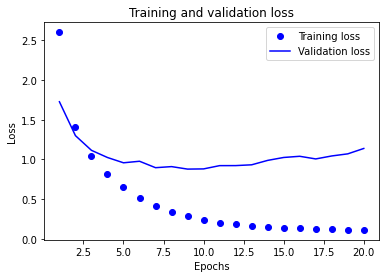

In [8]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss') 
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()

plt.show()

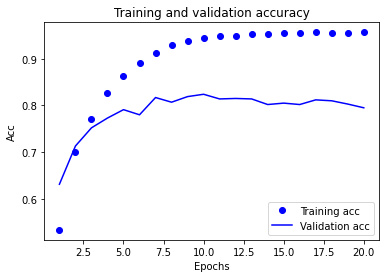

In [9]:
plt.clf() # 생성한 그래프 초기화
acc = history_dict['accuracy'] 
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.xlabel('Epochs')
plt.ylabel('Acc') 
plt.legend()
plt.show()

In [10]:
#9번째 epochs에서부터 overfitting되었음 
#따라서 epochs를 9까지로 제한하고 훈련 재시작
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,))) 
model.add(layers.Dense(64, activation='relu')) 
model.add(layers.Dense(46, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512) 
results = model.evaluate(x_test, one_hot_test_labels)
print(results)

Epoch 1/9
16/16 [==============================] - 1s 18ms/step - loss: 0.3755 - accuracy: 0.0375
Epoch 2/9
16/16 [==============================] - 0s 19ms/step - loss: 0.1174 - accuracy: 0.4214
Epoch 3/9
16/16 [==============================] - 0s 18ms/step - loss: 0.0748 - accuracy: 0.5677
Epoch 4/9
16/16 [==============================] - 0s 17ms/step - loss: 0.0555 - accuracy: 0.6612
Epoch 5/9
16/16 [==============================] - 0s 18ms/step - loss: 0.0437 - accuracy: 0.7189
Epoch 6/9
16/16 [==============================] - 0s 19ms/step - loss: 0.0353 - accuracy: 0.7734
Epoch 7/9
16/16 [==============================] - 0s 17ms/step - loss: 0.0295 - accuracy: 0.8107
Epoch 8/9
16/16 [==============================] - 0s 20ms/step - loss: 0.0249 - accuracy: 0.8439
Epoch 9/9
71/71 [==============================] - 0s 2ms/step - loss: 0.0338 - accuracy: 0.7756
[0.033801719546318054, 0.7756010890007019]
